In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('max_column', 100)

In [2]:
mst_path = '/Users/zihaoxu/R_repos/BikeSGV/datasets/mst/'
fig_path = '/Users/zihaoxu/R_repos/BikeSGV/export/02_summary_stats_ped/'

In [3]:
df = pd.read_csv(mst_path + 'clean_ped.csv')
df.head()

,intervalid,location_id,street1,street2,street3,latitude,longitude,date,weekday,period_begin,period_end,interval_begin,ns,sn,ew,we,specialneeds,skate,child,count_method,raining,unusual,bikewaytype,bikewaytype_options,road_class,speed_limit,landuse,pk_dataset_id,city,createdatetime,total_count,female,cane,dog,on_street
0,17560.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:00 AM,0,0,4,7,0,1,2.0,manual_in_house,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,11,0.0,0.0,0.0,0.0
1,17561.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:15 AM,0,0,0,0,0,0,0.0,manual_in_house,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,0,0.0,0.0,0.0,0.0
2,17562.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:30 AM,0,0,2,5,0,0,0.0,manual_in_house,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,7,0.0,0.0,0.0,0.0
3,17563.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:45 AM,0,0,1,3,0,0,0.0,manual_in_house,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,4,0.0,0.0,0.0,0.0
4,17564.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,12:00 PM,0,0,1,0,0,0,0.0,manual_in_house,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,1,0.0,0.0,0.0,0.0


In [4]:
num_cols = ['female', 'specialneeds', 'skate', 'child', 'cane', 'dog', 'on_street', 'total_count']

In [5]:
res = df.groupby('city').sum()[num_cols]
res = res.reset_index()
for col in num_cols[:-1]:
    res[col+'_perc'] = res[col] / res['total_count']
res

,city,female,specialneeds,skate,child,cane,dog,on_street,total_count,female_perc,specialneeds_perc,skate_perc,child_perc,cane_perc,dog_perc,on_street_perc
0,Altadena,416.0,36,9,286.0,0.0,0.0,52.0,1146,0.363002,0.031414,0.007853,0.249564,0.000000,0.000000,0.045375
1,Arcadia,260.0,13,22,129.0,0.0,0.0,5.0,1626,0.159902,0.007995,0.013530,0.079336,0.000000,0.000000,0.003075
2,Azusa,157.0,32,60,255.0,5.0,0.0,6.0,1391,0.112868,0.023005,0.043134,0.183321,0.003595,0.000000,0.004313
3,Baldwin Park,22.0,11,5,54.0,0.0,0.0,1.0,349,0.063037,0.031519,0.014327,0.154728,0.000000,0.000000,0.002865
4,Claremont,35.0,5,8,12.0,0.0,0.0,0.0,89,0.393258,0.056180,0.089888,0.134831,0.000000,0.000000,0.000000
5,Covina,2.0,20,30,179.0,0.0,0.0,0.0,914,0.002188,0.021882,0.032823,0.195842,0.000000,0.000000,0.000000
6,Duarte,26.0,37,33,180.0,0.0,0.0,3.0,1984,0.013105,0.018649,0.016633,0.090726,0.000000,0.000000,0.001512
7,E. Pasadena,112.0,7,3,51.0,0.0,0.0,14.0,255,0.439216,0.027451,0.011765,0.200000,0.000000,0.000000,0.054902
8,El Monte,0.0,7,18,209.0,0.0,0.0,0.0,405,0.000000,0.017284,0.044444,0.516049,0.000000,0.000000,0.000000
9,Glendora,0.0,30,29,285.0,0.0,2.0,0.0,970,0.000000,0.030928,0.029897,0.293814,0.000000,0.002062,0.000000


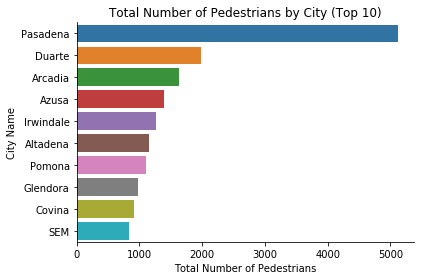

In [6]:
temp = res.sort_values('total_count', ascending = False)[['city', 'total_count']].head(10)
temp.to_csv(fig_path + 'total_peds.csv', index = None)

sns.barplot(data = temp, y = 'city', x = 'total_count', orient = "h")
sns.despine()
plt.ylabel('City Name')
plt.xlabel('Total Number of Pedestrians')
plt.title('Total Number of Pedestrians by City (Top 10)')
plt.tight_layout()
plt.savefig(fig_path + 'total_peds', fmt = 'png', dpi = 300)
plt.show()

In [7]:
def display_top(df, col, top_num = 5):
    ''' Get the top 5 cities in terms of col_prec or proportion for the given col '''
    return df.sort_values(col+'_perc', ascending = False)[['city', col+'_perc', col, 'total_count']].head(top_num)

def plot_proportion(col):
    ''' Plots the proportion of col for the summary stats '''
    temp = display_top(res, col)
    temp.to_csv(fig_path + col + '_city_ped.csv', index = None)
    sns.barplot(data = temp, y = 'city', x = col+'_perc', orient = "h")
    sns.despine()
    plt.ylabel('City Name')
    plt.xlabel(col.title() + ' Proportion')
    title_name = "On Street Pedestrians" if col == 'on_street' else col.title()
    plt.title('Percentage of ' + col.title() + ' by City (Top 5)\nPedestrians Data')
    plt.tight_layout()
    plt.savefig(fig_path + col + '_city_ped', fmt = 'png', dpi = 300)
    plt.show()

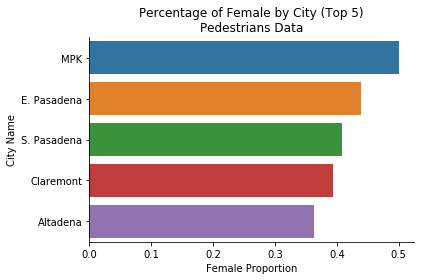

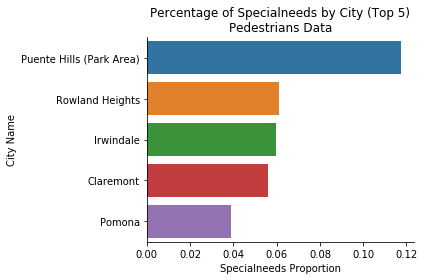

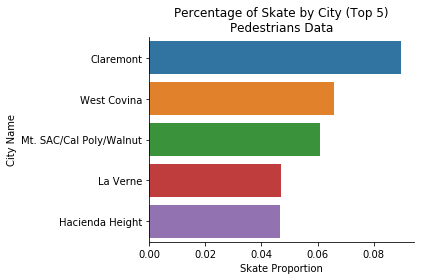

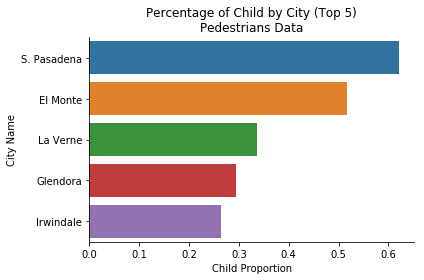

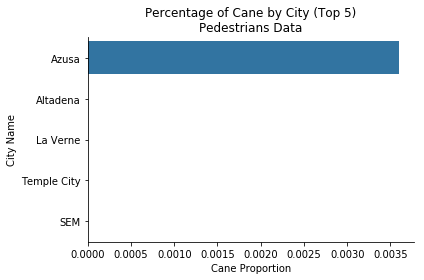

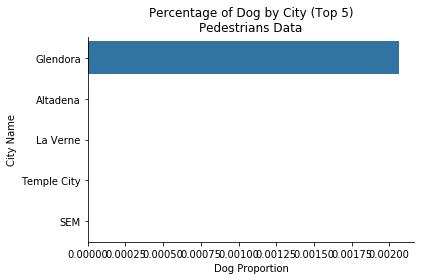

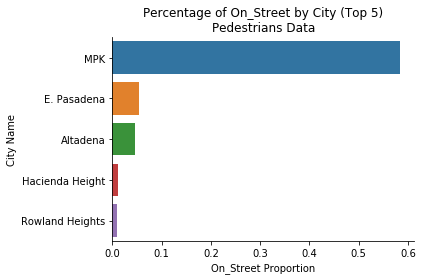

In [8]:
for col in num_cols[:-1]:
    plot_proportion(col)